<a href="https://colab.research.google.com/github/mopferman/sales-predictions/blob/main/Project_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
filename = '/content/drive/MyDrive/sales_predictions.csv'

In [3]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df[['Item_Weight']] = df[['Item_Weight']].fillna(value=0)

In [5]:
df[:10]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,0.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [10]:
df.fillna('Medium', inplace = True)

In [11]:
df[:10]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,0.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [12]:
df[df.duplicated(keep = False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [13]:
df.drop(columns = 'Outlet_Establishment_Year', inplace = True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

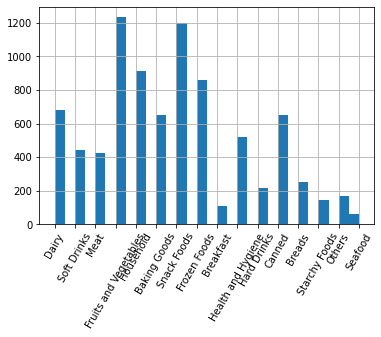

In [14]:
df['Item_Type'].hist(bins = 30);
plt.xticks(rotation = 60)

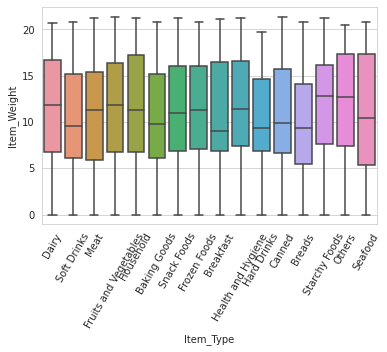

In [15]:
sns.set_style("whitegrid")

sns.boxplot(x = 'Item_Type', y = 'Item_Weight', data = df)
plt.xticks(rotation=60);

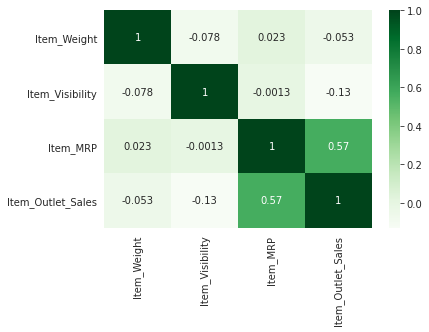

In [16]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot=True)

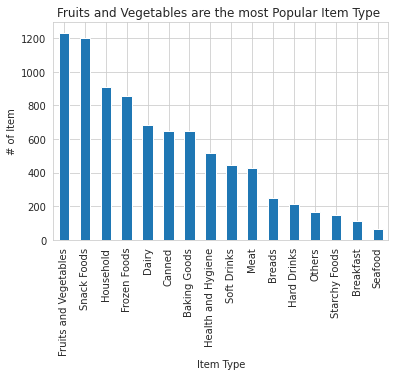

In [17]:
df['Item_Type'].value_counts().plot(kind = 'bar');
plt.xlabel('Item Type')
plt.ylabel('# of Item')
plt.title("Fruits and Vegetables are the most Popular Item Type ");

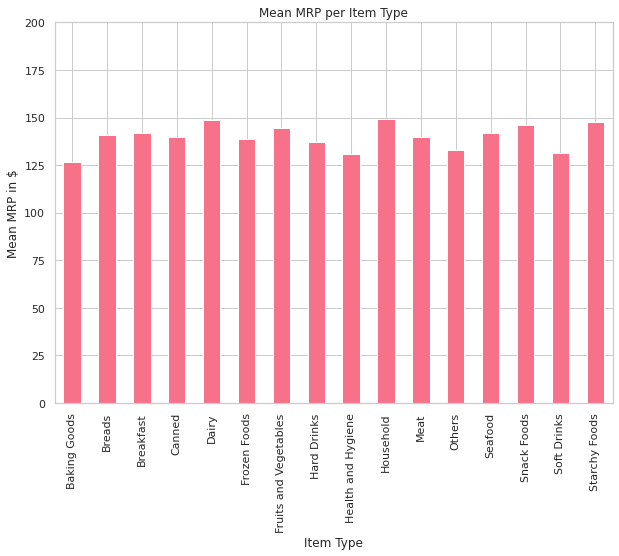

In [18]:
MRPItem = df.groupby(['Item_Type'])['Item_MRP'].mean()
sns.set_theme(style="whitegrid", palette='husl')
plt.ylim(0, 200)
MRPItem.plot(kind='bar', title='Mean MRP per Item Type', ylabel='Mean MRP in $',xlabel='Item Type', figsize=(10, 7));

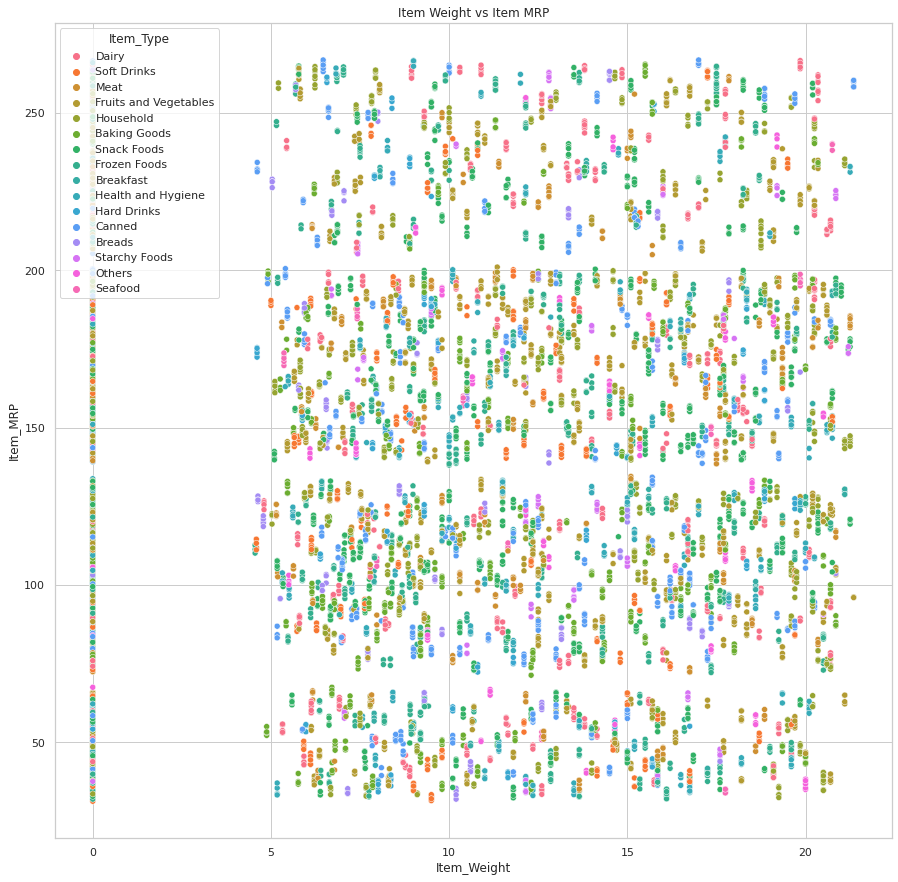

In [19]:
sns.scatterplot(data = df,x='Item_Weight', y = "Item_MRP", hue="Item_Type")
plt.gcf().set_size_inches((15, 15)) 
plt.title("Item Weight vs Item MRP");

In [20]:
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
df = pd.get_dummies(df, columns = categorical_cols)

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
y = df['Item_Outlet_Sales']
X = df.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis = 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [25]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, reg_model.predict(X_train))))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, reg_model.predict(X_test))))

Training RMSE: 1140.18025352372
Test RMSE: 1094.9276472500087


In [26]:
reg = LinearRegression(fit_intercept=True)
reg.fit(X,y)
preds = reg.predict(X)

r2_score(y, preds)

0.5627314866354607

In [27]:
print(reg_model.coef_)


[   -1.81979152  -424.78110554    15.71260242   -65.07711595
    -6.49098862    58.52654895    57.52599407   -44.48443846
   -18.66753593   -48.03064753    29.75511261     7.54743595
  -125.74255289   -19.0574944     26.20956668    -7.34797996
     9.25934974   -14.06685555   -28.34768208   -47.70397393
   300.27432288   -39.1009682    -58.96750431    33.98740693
     9.78546051   -17.1947277      7.40926718   -10.89763882
     3.87106282     7.026576   -1741.66949335   224.00751463
   -82.45401358  1600.11599229]


In [28]:
print(reg_model.intercept_)

-61.744136342492766


Simple Decision Tree Model

In [29]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)

In [30]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [31]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [32]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.15257112102710946


In [33]:
dec_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [34]:
dec_tree.get_depth()

41

In [35]:
max_depth_range = list(range(2, 36)) # 
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

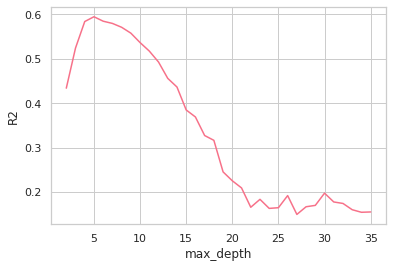

In [36]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [37]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.6038833365643217
0.5946651038759525


This is the R2 score for the max depth of a decision tree

In [38]:
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, dec_tree_5.predict(X_train))))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, dec_tree_5.predict(X_test))))

Training RMSE: 1082.7232884087905
Test RMSE: 1057.5016654179399


Now: Bagged v Random Forest

In [39]:
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(random_state = 42)

In [40]:
bagreg

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [41]:
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [42]:
bagreg.predict(X_test)

array([ 648.95526,  924.7962 ,  777.72098, ..., 4667.9238 , 2577.71128,
       1747.92474])

In [43]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9158642717197641
0.5230461641274515


In [44]:
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, bagreg.predict(X_train))))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, bagreg.predict(X_test))))

Training RMSE: 498.9949508897269
Test RMSE: 1147.1289380469068


In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [46]:
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [47]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [48]:
rf.predict(X_test)

array([ 696.646514,  959.178112,  750.835976, ..., 4542.45379 ,
       2228.113016, 2188.045172])

In [49]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9364656247268466
0.5470450141849208


In [50]:
rf_5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf_5.fit(X_train, y_train)
rf_5_train_score = rf_5.score(X_train, y_train)
rf_5_test_score = rf_5.score(X_test, y_test)
print(rf_5_train_score)
print(rf_5_test_score)

0.6106876175604188
0.6020794660074533


In [51]:
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, rf_5.predict(X_train))))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, rf_5.predict(X_test))))

Training RMSE: 1073.383785536955
Test RMSE: 1047.785147650668


Overall Recommendation:
The Decision Tree model has the closest values for the testing and training RMSE. While the Linear Regression and Random Forest models results were not far off from each other, the Decision Tree Model produced the best score overall and indicates a good fit. 